In [4]:
from uvb_abun_pairwise_compare import *

import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
with open("/mnt/scratch/tairaeli/halo2392/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    salsa_out_dict = pickle.load(salsa_dat)

In [7]:
salsa_out_dict

{'C II': {'FG_2009':     name     wave  redshift   col_dens     delta_v  vel_dispersion  \
  0   C II  903.962         2  14.326025 -163.230202        0.000000   
  1   C II  903.962         2  16.076510 -110.357232       19.332754   
  2   C II  903.962         2  17.326788 -150.632491       39.282247   
  3   C II  903.962         2  13.767157 -238.428973        0.000000   
  4   C II  903.962         2  15.111377 -231.569763        0.000000   
  5   C II  903.962         2  15.285200 -214.449136        8.787406   
  6   C II  903.962         2  13.026028 -159.225485        0.000000   
  7   C II  903.962         2  15.908702 -204.873032       11.760625   
  8   C II  903.962         2  16.883350 -150.815103        1.796075   
  9   C II  903.962         2  15.637015 -150.246234        3.017100   
  10  C II  903.962         2  15.924196 -153.714886        6.055825   
  11  C II  903.962         2  16.783561 -153.543316       12.107166   
  12  C II  903.962         2  16.178112 -117

In [15]:
salsa_out_dict["C IV"]["HM_2012"][salsa_out_dict["C IV"]["HM_2012"]["lightray_index"] == "1"]

,name,wave,redshift,col_dens,delta_v,vel_dispersion,interval_start,interval_end,density,temperature,metallicity,radius,gas,lightray_index
13,C IV,1548.187,2,13.709645,-141.743858,6.807404,45,62,3.562865e-28,44764.135435,0.020722,5.673637e+25,3.562865e-28,1
14,C IV,1548.187,2,16.211639,58.665527,4.270560,253,292,3.282692e-27,23102.355284,1.115833,4.414123e+24,3.282692e-27,1
15,C IV,1548.187,2,15.443951,-86.147492,41.083350,429,471,1.573922e-26,19153.158044,0.064888,2.819622e+24,1.573922e-26,1
16,C IV,1548.187,2,15.255973,130.080094,11.219851,553,562,9.946164e-27,161190.780644,0.522438,2.585078e+24,9.946164e-27,1
17,C IV,1548.187,2,13.099715,38.867187,17.851635,600,604,4.578854e-28,229397.727730,0.594949,3.360477e+24,4.578854e-28,1
18,C IV,1548.187,2,15.588159,134.083468,13.497894,649,710,1.081571e-26,13080.961184,0.119814,3.149941e+24,1.081571e-26,1
19,C IV,1548.187,2,15.482486,21.419312,2.405659,786,805,1.563120e-26,18491.385031,0.224794,3.129733e+24,1.563120e-26,1
20,C IV,1548.187,2,14.579756,96.691660,10.711093,917,931,7.548744e-27,30333.658515,0.058327,3.110522e+24,7.548744e-27,1


In [9]:
%reload_ext autoreload
%autoreload 2

ion_list = ["C IV"]

compare_dict, col_dens_1, col_dens_2 = pairwise_compare(salsa_out_dict,ion_list,1)

len(col_dens_1) == len(col_dens_2)

True

In [6]:
col_dens_1

{'C II': {0: [13.29990434171275,
   15.162027863085813,
   16.85178128910534,
   13.532513046747148,
   14.258231140394274,
   14.315756276963345,
   14.952632924251532,
   16.180923232952928,
   14.658408039025025,
   14.942603914704616,
   15.924113431656282,
   15.223227988926276,
   13.409235713582255,
   13.228572167327458,
   16.955961968415632]}}

In [7]:
col_dens_2 == col_dens_1

True

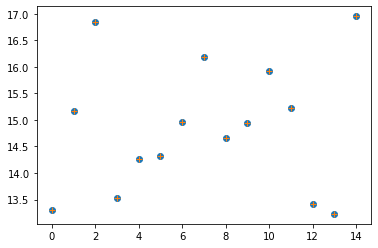

In [8]:
clump_ids = range(len(col_dens_1["C II"][0]))

plt.plot(clump_ids, col_dens_1["C II"][0], linestyle = "None", marker = "o")
plt.plot(clump_ids, col_dens_2["C II"][0], linestyle = "None", marker = "+")

In [11]:
tl = ["b","c","d","e"]

for i,bing in enumerate(tl):
    print(i,bing)
    

0 b
1 c
2 d
3 e
